In [16]:
# Importamos todas las librerías que necesitamos 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [17]:
# Importamos los datasets

region_1 = pd.read_csv('/datasets/geo_data_0.csv')
region_2 = pd.read_csv('/datasets/geo_data_1.csv')
region_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [18]:
# Imprimimos las primeras filas de cada dataset

print(region_1.head())
print(region_2.head())
print(region_3.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [19]:
# Imprimimos las últimas filas de los datasets

print(region_1.tail())
print(region_2.tail())
print(region_3.tail())

          id        f0        f1        f2     product
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246
          id         f0         f1        f2     product
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103
          id        f0        f1        f2     product
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.77576

In [20]:
# Imprimimos la información de cada dataset

print(region_1.info())
print('-------'*15)
print(region_2.info())
print('-------'*15)
print(region_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
----------------

**Conclusiones Iniciales**

- Tenemos datasets para tres regiones diferentes. 
- Todos los datasets tiene las mismas columnas y la misma cantidad de filas. 
- Tenemos una columna de id en cada dataset para identificar pozos de reservas únicos. 
- Tenemos características que nos ayudaran a entrenar nuestros modelos. Estas son las columnas `f0`, `f1`, y `f2`. Y tenemos nuestra columna llamada `producto` que nos indica la cantidad de reservas de petróleo en este pozo. 
- No tenemos valores ausentes en ninguna de nuestras columnas. 

### Duplicados 

In [21]:
# Imprimimos la cantidad de valores únicos en nuestra columna id de cada dataset

print(region_1['id'].nunique())
print(region_2['id'].nunique())
print(region_3['id'].nunique())

99990
99996
99996


In [22]:
# Imprimimos la cantidad de duplicados en cada dataset.

print(region_1['id'].duplicated().sum())
print(region_2['id'].duplicated().sum())
print(region_3['id'].duplicated().sum())

10
4
4


**Conclusiones Duplicados**

Ya que tenemos una columna de identificador único, hemos buscado duplicados en esta columna para cada conjunto de datos. Podemos observar que tenemos duplicados en cada conjunto de datos. Tenemos 10 duplicados en la región uno y 4 duplicados en la región dos y tres. Vamos a eliminar estos duplicados para que no afecten a nuestro análisis. 

**Arreglando duplicados**

In [23]:
# Eliminamos los duplicados de cada dataset en la columna id usando un bucle

datasets = [region_1,region_2,region_3]

for dataset in datasets:
    dataset.drop_duplicates(subset= 'id', inplace=True)
    print(dataset.info())
    print('------'*15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
None
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
None
-----------------------------------------------

Ya no tenemos mas duplicados

### Outliers

Como tenemos tres conjuntos de datos, vamos a tener que analizar los outsiders de cada conjunto de datos por separado. 

**Outliers data_1**

In [24]:
# Creamos una función que nos ayudara a analizar los outsiders de cada conjunto de datos

def outliers(df,col,ylabel=None):
    df.boxplot(col,figsize=(8,5))
    plt.title('Boxplot of ' + col)
    plt.ylabel(ylabel)
    plt.show()

    min = df[col].min()
    values_0 = len(df[df[col] <= 0])
    percentage_values_0 = '{:.2%}'.format(len(df[df[col] <= 0])/len(df))

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    up_limit = Q3 + IQR
    low_limit = Q1 - IQR

    values_up_limit = len(df[df[col] >= up_limit])
    values_low_limit = len(df[df[col] <= low_limit])

    percentage_up_limit = '{:.2%}'.format(len(df[df[col] >= up_limit])/len(df))
    percentage_low_limit = '{:.2%}'.format(len(df[df[col] <= low_limit])/len(df))

    print(df[col].describe())
    print()
    print(f'El IQR de {col} es {IQR}')
    print()
    
    print(f'EL limite inferior de nuestro boxplot es {low_limit}')
    print()
    print(f'La cantidad de valores iguales o menores a {low_limit} es {values_low_limit}')
    print()
    print(f'El porcentaje de valores iguales o menores a {low_limit} es {percentage_low_limit}')

    print()
    print(f'EL limite superior es de nuestro boxplot es {up_limit}')
    print()
    print(f'La cantidad de volores iguales o superiores a {up_limit} es {values_up_limit}')
    print()
    print(f'Elporcentaje de valores iguales o superiores a {up_limit} es {percentage_up_limit}')

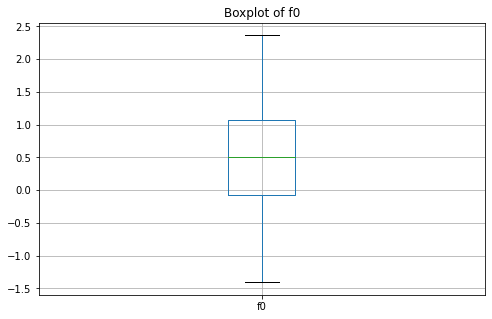

count    99990.000000
mean         0.500454
std          0.871844
min         -1.408605
25%         -0.072572
50%          0.502405
75%          1.073626
max          2.362331
Name: f0, dtype: float64

El IQR de f0 es 1.1461982811195714

EL limite inferior de nuestro boxplot es -1.2187704912229576

La cantidad de valores iguales o menores a -1.2187704912229576 es 41

El porcentaje de valores iguales o menores a -1.2187704912229576 es 0.04%

EL limite superior es de nuestro boxplot es 2.219824352135757

La cantidad de volores iguales o superiores a 2.219824352135757 es 50

Elporcentaje de valores iguales o superiores a 2.219824352135757 es 0.05%


In [25]:
# Outliers de la primera región columna f0

outliers(region_1,'f0')

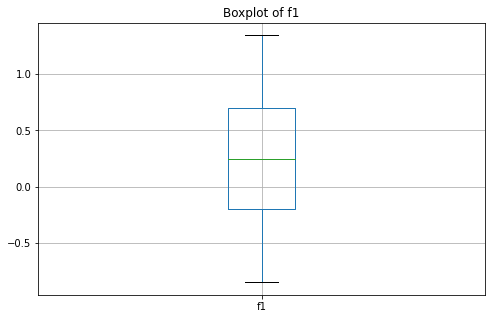

count    99990.000000
mean         0.250141
std          0.504430
min         -0.848218
25%         -0.200877
50%          0.250252
75%          0.700640
max          1.343769
Name: f1, dtype: float64

El IQR de f1 es 0.9015167546436265

EL limite inferior de nuestro boxplot es -1.1023938003242804

La cantidad de valores iguales o menores a -1.1023938003242804 es 0

El porcentaje de valores iguales o menores a -1.1023938003242804 es 0.00%

EL limite superior es de nuestro boxplot es 1.6021564636065992

La cantidad de volores iguales o superiores a 1.6021564636065992 es 0

Elporcentaje de valores iguales o superiores a 1.6021564636065992 es 0.00%


In [26]:
# Outliers de la primera región columna f1

outliers(region_1,'f1')

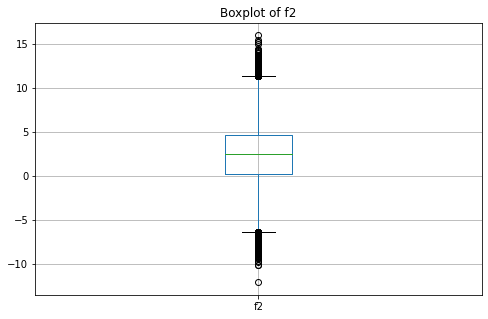

count    99990.000000
mean         2.502629
std          3.248149
min        -12.088328
25%          0.287784
50%          2.515969
75%          4.715035
max         16.003790
Name: f2, dtype: float64

El IQR de f2 es 4.427251130475917

EL limite inferior de nuestro boxplot es -4.139466803655119

La cantidad de valores iguales o menores a -4.139466803655119 es 1960

El porcentaje de valores iguales o menores a -4.139466803655119 es 1.96%

EL limite superior es de nuestro boxplot es 9.142286587772633

La cantidad de volores iguales o superiores a 9.142286587772633 es 1976

Elporcentaje de valores iguales o superiores a 9.142286587772633 es 1.98%


In [27]:
# Outliers de la primera región columna f2

outliers(region_1,'f2')

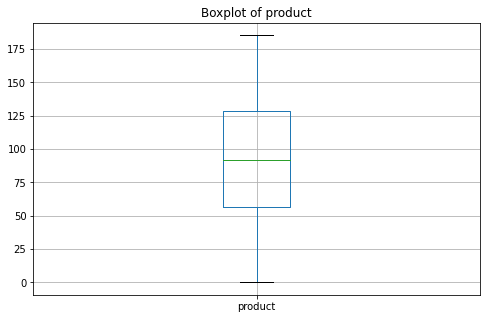

count    99990.000000
mean        92.499684
std         44.288304
min          0.000000
25%         56.497069
50%         91.847928
75%        128.563699
max        185.364347
Name: product, dtype: float64

El IQR de product es 72.06662996121355

EL limite inferior de nuestro boxplot es -15.569561344697895

La cantidad de valores iguales o menores a -15.569561344697895 es 0

El porcentaje de valores iguales o menores a -15.569561344697895 es 0.00%

EL limite superior es de nuestro boxplot es 200.63032853894276

La cantidad de volores iguales o superiores a 200.63032853894276 es 0

Elporcentaje de valores iguales o superiores a 200.63032853894276 es 0.00%


In [28]:
# Outliers de la primera región columna product

outliers(region_1,'product')

**Conclusiones**

En nuestro primer conjunto podemos ver que la mayoría de nuestras columnas tiene cantidad mínima o nula de outliers excepto por la columna `f2`. A pesar de eso, no tenemos suficiente información en cuanto al significado de estos valores. Por ende, no haremos nada al respecto. 

**Outliers data_2**

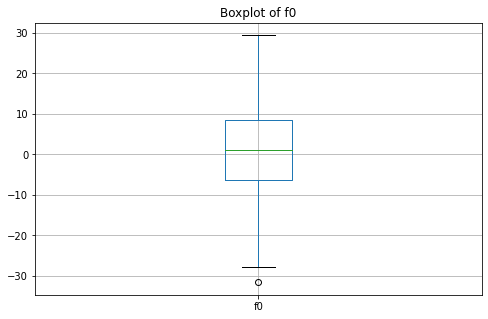

count    99996.000000
mean         1.141209
std          8.965815
min        -31.609576
25%         -6.298551
50%          1.153055
75%          8.620964
max         29.421755
Name: f0, dtype: float64

El IQR de f0 es 14.919514699277846

EL limite inferior de nuestro boxplot es -21.218065854455343

La cantidad de valores iguales o menores a -21.218065854455343 es 67

El porcentaje de valores iguales o menores a -21.218065854455343 es 0.07%

EL limite superior es de nuestro boxplot es 23.540478243378196

La cantidad de volores iguales o superiores a 23.540478243378196 es 75

Elporcentaje de valores iguales o superiores a 23.540478243378196 es 0.08%


In [29]:
# Outliers region dos columna f0

outliers(region_2,'f0')

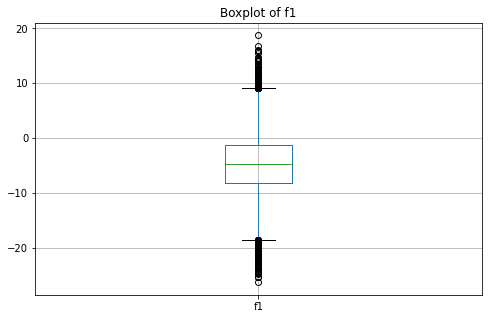

count    99996.000000
mean        -4.796608
std          5.119906
min        -26.358598
25%         -8.267985
50%         -4.813172
75%         -1.332816
max         18.734063
Name: f1, dtype: float64

El IQR de f1 es 6.935168823275486

EL limite inferior de nuestro boxplot es -15.203153657944636

La cantidad de valores iguales o menores a -15.203153657944636 es 2067

El porcentaje de valores iguales o menores a -15.203153657944636 es 2.07%

EL limite superior es de nuestro boxplot es 5.602352811881822

La cantidad de volores iguales o superiores a 5.602352811881822 es 2125

Elporcentaje de valores iguales o superiores a 5.602352811881822 es 2.13%


In [30]:
# Outliers region dos columna f1

outliers(region_2,'f1')

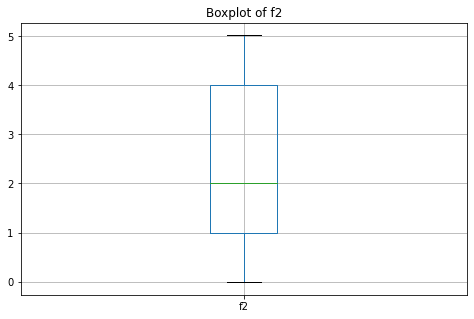

count    99996.000000
mean         2.494501
std          1.703579
min         -0.018144
25%          1.000021
50%          2.011475
75%          3.999904
max          5.019721
Name: f2, dtype: float64

El IQR de f2 es 2.9998833869181905

EL limite inferior de nuestro boxplot es -1.9998627073186148

La cantidad de valores iguales o menores a -1.9998627073186148 es 0

El porcentaje de valores iguales o menores a -1.9998627073186148 es 0.00%

EL limite superior es de nuestro boxplot es 6.999787453435957

La cantidad de volores iguales o superiores a 6.999787453435957 es 0

Elporcentaje de valores iguales o superiores a 6.999787453435957 es 0.00%


In [31]:
# Outliers region dos columna f2

outliers(region_2,'f2')

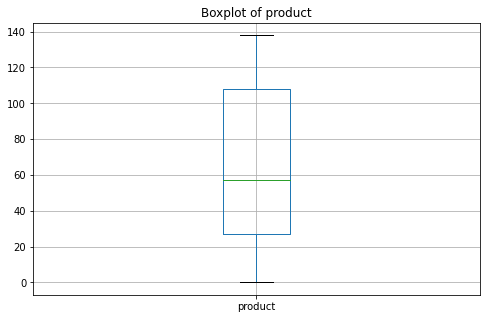

count    99996.000000
mean        68.823916
std         45.944663
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64

El IQR de product es 80.85978309461908

EL limite inferior de nuestro boxplot es -53.906522063079386

La cantidad de valores iguales o menores a -53.906522063079386 es 0

El porcentaje de valores iguales o menores a -53.906522063079386 es 0.00%

EL limite superior es de nuestro boxplot es 188.67282722077783

La cantidad de volores iguales o superiores a 188.67282722077783 es 0

Elporcentaje de valores iguales o superiores a 188.67282722077783 es 0.00%


In [32]:
# Outliers region dos columna product

outliers(region_2,'product')

**Conclusiones**

En este conjunto de datos tenemos de igual manera casi todas las columnas sin outliers o como un porcentaje de outliers bastante bajo, excepto por la columna `f0`. De igual manera no haremos nada al respecto de los outliers encontrados ya que necesita todos los datos para entrenar nuestro modelo.  

**Outliers data_3**

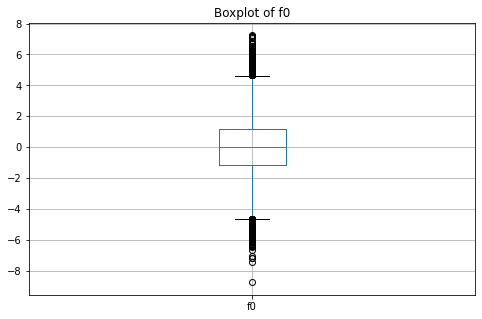

count    99996.000000
mean         0.002002
std          1.732052
min         -8.760004
25%         -1.162328
50%          0.009424
75%          1.158477
max          7.238262
Name: f0, dtype: float64

El IQR de f0 es 2.3208050886187266

EL limite inferior de nuestro boxplot es -3.483132771407444

La cantidad de valores iguales o menores a -3.483132771407444 es 2203

El porcentaje de valores iguales o menores a -3.483132771407444 es 2.20%

EL limite superior es de nuestro boxplot es 3.4792824944487357

La cantidad de volores iguales o superiores a 3.4792824944487357 es 2301

Elporcentaje de valores iguales o superiores a 3.4792824944487357 es 2.30%


In [33]:
# Outliers región tres columna f0

outliers(region_3,'f0')

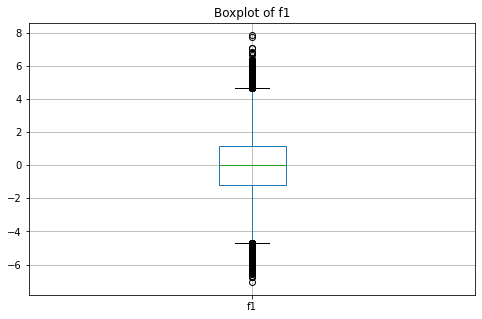

count    99996.000000
mean        -0.002159
std          1.730397
min         -7.084020
25%         -1.174841
50%         -0.009661
75%          1.163523
max          7.844801
Name: f1, dtype: float64

El IQR de f1 es 2.3383633749506085

EL limite inferior de nuestro boxplot es -3.513204053491714

La cantidad de valores iguales o menores a -3.513204053491714 es 2092

El porcentaje de valores iguales o menores a -3.513204053491714 es 2.09%

EL limite superior es de nuestro boxplot es 3.501886071360111

La cantidad de volores iguales o superiores a 3.501886071360111 es 2209

Elporcentaje de valores iguales o superiores a 3.501886071360111 es 2.21%


In [34]:
# Outliers región tres columna f1

outliers(region_3,'f1')

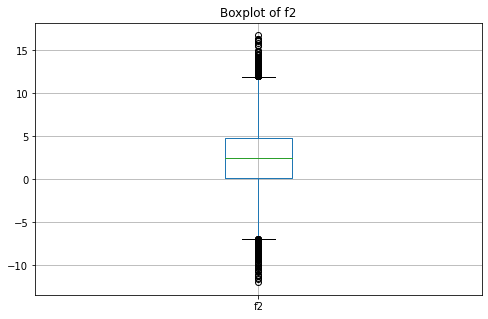

count    99996.000000
mean         2.495084
std          3.473482
min        -11.970335
25%          0.130269
50%          2.484236
75%          4.858720
max         16.739402
Name: f2, dtype: float64

El IQR de f2 es 4.728450978495317

EL limite inferior de nuestro boxplot es -4.598182087413645

La cantidad de valores iguales o menores a -4.598182087413645 es 2019

El porcentaje de valores iguales o menores a -4.598182087413645 es 2.02%

EL limite superior es de nuestro boxplot es 9.587170848072308

La cantidad de volores iguales o superiores a 9.587170848072308 es 2013

Elporcentaje de valores iguales o superiores a 9.587170848072308 es 2.01%


In [35]:
# Outliers región tres columna f2

outliers(region_3,'f2')

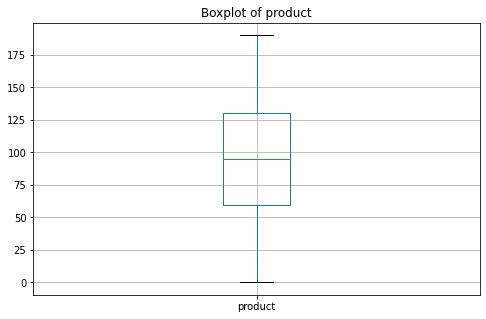

count    99996.000000
mean        94.998342
std         44.749573
min          0.000000
25%         59.450028
50%         94.925026
75%        130.586815
max        190.029838
Name: product, dtype: float64

El IQR de product es 71.13678684086165

EL limite inferior de nuestro boxplot es -11.686758529076648

La cantidad de valores iguales o menores a -11.686758529076648 es 0

El porcentaje de valores iguales o menores a -11.686758529076648 es 0.00%

EL limite superior es de nuestro boxplot es 201.72360199350828

La cantidad de volores iguales o superiores a 201.72360199350828 es 0

Elporcentaje de valores iguales o superiores a 201.72360199350828 es 0.00%


In [36]:
# Outliers región tres columna product

outliers(region_3,'product')

**Conclusiones**

En esta columna, la mayoría de las columnas tiene outliers excepto por la columna `product`. De igual manera no haremos nada al respecto. 

## Creación del Modelos

Haremos lo siguiente:

- Crearemos un modelo de regresión lineal para cada región
- Dividiremos nuestros datasets en conjuntos de características y objetivos.
- Dividiremos nuestros conjuntos de características y objetivos en conjuntos de entrenamiento y validación. Los conjuntos de validación serán un 25% de los conjuntos de entrenamiento ya que necesitamos la mayor cantidad de datos para poder entrenar a cada uno de nuestros modelos. 


### Region 1

In [37]:
# Dividimos nuestro conjunto de datos en características y objetivo. 

features_1 = region_1.drop(['id','product'],axis=1)
target_1 = region_1['product'] 

# Creamos conjuntos de entrenamiento y validación 

features_train, features_valid, target_train, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

In [38]:
# Entrenamos nuestro modelo de regresión logística

scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

model = LinearRegression()
model.fit(features_train, target_train)
predictions_1 = model.predict(features_valid)
mse = mean_squared_error(target_valid_1, predictions_1)
rmse_1 = mse**0.5
print(mse)
print(rmse_1)
print(predictions_1.mean())

1432.8895312377324
37.853527328872964
92.78915638280621


### Region 2

In [39]:
# Dividimos nuestro conjunto de datos en características y objetivo. 

features_2 = region_2.drop(['id','product'],axis=1)
target_2 = region_2['product'] 

# Creamos conjuntos de entrenamiento y validación 

features_train, features_valid, target_train, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [40]:
# Entrenamos nuestro modelo de regresión logística

scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

model = LinearRegression()
model.fit(features_train, target_train)
predictions_2 = model.predict(features_valid)
mse = mean_squared_error(target_valid_2, predictions_2)
rmse_2 = mse**0.5
print(mse)
print(rmse_2)
print(predictions_2.mean())

0.7957697318650319
0.8920592647717033
69.1783195703043


### Region 3

In [41]:
# Dividimos nuestro conjunto de datos en características y objetivo. 

features_3 = region_3.drop(['id','product'],axis=1)
target_3 = region_3['product'] 

# Creamos conjuntos de entrenamiento y validación 

features_train, features_valid, target_train, target_valid_3 = train_test_split(
    features_3, target_3, test_size=0.25, random_state=12345)

In [42]:
# Entrenamos nuestro modelo de regresión logística

scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
model = LinearRegression()
model.fit(features_train, target_train)
predictions_3 = model.predict(features_valid)
mse = mean_squared_error(target_valid_3, predictions_3)
rmse_3 = mse**0.5
print(mse)
print(rmse_3)
print(predictions_3.mean())

1606.0738119304278
40.07585073246016
94.86572480562035


In [43]:
print(predictions_1.mean())
print(predictions_2.mean())
print(predictions_3.mean())


92.78915638280621
69.1783195703043
94.86572480562035


In [44]:
print(target_valid_1.mean())
print(target_valid_2.mean())
print(target_valid_3.mean())

92.15820490940044
69.18604400957675
94.7851093536914


**Conclusiones**

- El modelo con RECM más bajo es el modelo de regresión logística de la región dos. 
- El mejor promedio del volumnen de las reservas de petróleo por pozo es el de la reserva tres con un promedio de 94.79. Después le sigue la reserva número uno y al último tenemos la reserva número dos. 
- Imprimimos los promedios de reservas de cada región tanto las predicciones y los valores reales y podemos ver que cada valor se acerca bastante al real. 


## Preparación para el cálculo de ganancias

Necesitamos averiguar cuál es la mejor región para poder establecer un nuevo pozo para la empresa. Para esto vamos averiguar el volumen de reservas de petróleo que necesitamos para no tener pérdidas. También crearemos una función que nos ayudara a calcular el beneficio obtenido en cada región y así poder encontrar la región con mayor porcentaje de ganancia.  

In [45]:
# Averiguamos la cantidad de reservas de petróleo por pozo que necesitamos para no tener pérdidas. 

oil_wells_needed = 200
budget = 100000000
earnings_per_product = 4500
oil_barrels_break_even = budget / (oil_wells_needed * earnings_per_product)
oil_barrels_break_even

111.11111111111111

**Conclusiones**

Podemos ver que necesitamos que cada pozo tenga al menos 111 en volumen de reservas para poder llegar al punto de recuperar toda la inversión de los 100 mil dólares. Si comparamos este volumen de reservas con los volúmenes promedio de cada región, vemos que ningún volumen promedio de ninguna región llega al valor necesitado. El que más se acerca es el de la tres uno con un volumen promedio de 94. Sin embargo, este es solo el valor promedio. En nuestro siguiente análisis podremos ver exactamente cuál región genera más posos con mayor volumen que nos ayudara a obtener la mayor cantidad de ganancias. 

**Ganancias por Region**

In [46]:
def profit(predictions, price, budget,count):
    predictions_sorted = np.sort(predictions)[::-1][:count]
    result = (predictions_sorted.sum() * price) - budget
    return result

In [47]:
print(f'Profit Region 1 ${profit(predictions_1, earnings_per_product, budget,201)}')
print(f'Profit Region 2 ${profit(predictions_2, earnings_per_product, budget,201)}')
print(f'Profit Region 3 ${profit(predictions_3, earnings_per_product, budget,201)}')

Profit Region 1 $40482848.45853189
Profit Region 2 $25483307.266412303
Profit Region 3 $34271108.1928581


**Conclusiones**

Al tomar los 200 valores más altos de cada una de nuestras regiones y aplicarles nuestra función de ganancias, podemos ver que todas las regiones están generando ganancias. Esto quiere decir que los volúmenes de reservas de cada pozo en cada región son suficiente para generar ganancias. Sin embargo, podemos ver claramente que es la región uno la que está generando mayores ganancias según las predicciones de nuestro modelo. 

## Riesgos y Ganacias por Region

Vamos a analizar las posibles ganancias que podríamos obtener de acuerdo a cada región que hemos analizado. Para esto vamos a utilizar la técnica de bootstraping utilizando mil muestras. Vamos a encontrar el beneficio promedio, el intervalo de confianza de 95%, y el riesgo de pérdida de cada región. 

### Region 1

In [48]:
state = np.random.RandomState(12345)
    
values = []

losses_count = 0

predictions_1 = pd.Series(predictions_1)

for i in range(1000):
    probs_subsample_1 = predictions_1.sample(n=500, replace=True, random_state=state)
    
    profit_value = profit(probs_subsample_1, earnings_per_product, budget, 201)

    values.append(profit_value)
    
    if profit_value < 0:
        losses_count += 1
    
values = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 2.5 %:", lower)
print("Cuantil del 97.5 %:", upper)
print("Riesgo de perdida:", losses_count/1000)

Ingresos promedio: 4259844.868432617
Cuantil del 2.5 %: 2030717.7430345155
Cuantil del 97.5 %: 6541709.536444148
Riesgo de perdida: 0.0


### Region 2

In [49]:
state = np.random.RandomState(12345)
    
values = []

losses_count = 0

predictions_2 = pd.Series(predictions_2)

for i in range(1000):
    probs_subsample_2 = predictions_2.sample(n=500, replace=True, random_state=state)
    
    profit_value = profit(probs_subsample_2, earnings_per_product, budget, 201)

    values.append(profit_value)
    
    if profit_value < 0:
        losses_count += 1
    
values = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 2.5 %:", lower)
print("Cuantil del 97.5 %:", upper)
print("Riesgo de perdida:", losses_count/1000)

Ingresos promedio: 5124092.438007004
Cuantil del 2.5 %: 1242104.2021179376
Cuantil del 97.5 %: 9048408.25514625
Riesgo de perdida: 0.008


### Region 3

In [50]:
state = np.random.RandomState(12345)
    
values = []
losses_count = 0

predictions_3 = pd.Series(predictions_3)

for i in range(1000):
    probs_subsample_3 = predictions_3.sample(n=500, replace=True, random_state=state)
    
    profit_value = profit(probs_subsample_3, earnings_per_product, budget, 201)

    values.append(profit_value)
    
    if profit_value < 0:
        losses_count += 1
        
values = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 2.5 %:", lower)
print("Cuantil del 97.5 %:", upper)
print("Riesgo de perdida:", losses_count/1000)

Ingresos promedio: 3446770.5792718227
Cuantil del 2.5 %: 1483787.3507156507
Cuantil del 97.5 %: 5439694.915130092
Riesgo de perdida: 0.0


**Conclusiones**

- Todas las regiones generan ingresos
- Ninguna región genera pérdidas. 
- La región con mayores ganancias tras la implementación de la técnica de bootstrapping fue a región dos. Con un promedio de ganancias de 5,124,092, un intervalo de confianza del 95% (1,242,104-9,048,408), y un riesgo de pérdidas de 0.008%. 
- Sería recomendable hacer el pozo en la región dos ya que tiene mayores posibilidades de generar mayores ingresos que las otras dos regiones.


## Conclusiones Generales

**Exploración de datos**

- Tenemos datasets para tres regiones diferentes.
- Todos los datasets tiene las mismas columnas y la misma cantidad de filas.
- Tenemos una columna de id en cada dataset para identificar pozos de reservas únicos.
- Tenemos características que nos ayudaran a entrenar nuestros modelos. Estas son las columnas f0, f1, y f2. Y tenemos nuestra columna llamada producto que nos indica la cantidad de reservas de petróleo en este pozo.
- No tenemos valores ausentes en ninguna de nuestras columnas.

**Duplicados**

- Encontramos duplicados en cada conjunto de datos y los eliminamos. 

**Outliers**

- Encontramos diferentes patrones de outliers en cada conjunto de datos. No todas las columnas tenían outliers. 
- No hicimos nada con respecto a los outliers ya que necesitábamos todos los datos para entrenar nuestros modelos. 

**Creación de Modelos**

- El modelo con RECM más bajo es el modelo de regresión logística de la región dos.
- El mejor promedio del volumnen de las reservas de petróleo por pozo es el de la reserva tres con un promedio de 94.79. Después le sigue la reserva número uno y al último tenemos la reserva número dos.

**Riesgos y Ganancias por Región**

- Todas las regiones generan ingresos
- Ninguna región genera pérdidas. 
- La región con mayores ganancias tras la implementación de la técnica de bootstrapping fue a región dos. Con un promedio de ganancias de 5,124,092, un intervalo de confianza del 95% (1,242,104-9,048,408), y un riesgo de pérdidas de 0.008%. 
- Sería recomendable hacer el pozo en la región dos ya que tiene mayores posibilidades de generar mayores ingresos que las otras dos regiones.
